<a href="https://colab.research.google.com/github/obeabi/Assignments/blob/master/LinearRegression_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Assignment 
## Written by Abiola Obembe
### Date: 2021-01-27
### Course: ML masters with deployment and deep learning
### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### ----------  Assignment starts here -------------------------------------------------

Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.
Here is the code to load the data:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [269]:
# Here is the code to load the data:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos_y = pd.DataFrame(boston.target)

In [270]:
# Import regression models from sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 

In [271]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [272]:
# Visualize the feature dataset
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [273]:
# Examine the shape of the X dataframe
bos.shape

(506, 13)

In [274]:
# Check for basic information
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [275]:
# Check for missing values
print(" There are {} missing values in the dataframe" . format(bos.isna().sum().sum()))

 There are 0 missing values in the dataframe


In [276]:
# Examine the target varaible
bos_y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [277]:
# Check for missing values
bos_y.isna().sum()

0    0
dtype: int64

In [278]:
# concateate both X and y dataframe
df = pd.concat([bos, bos_y], axis = 1, ignore_index= True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [279]:
# Basic statistics of the dataframe
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## EDA

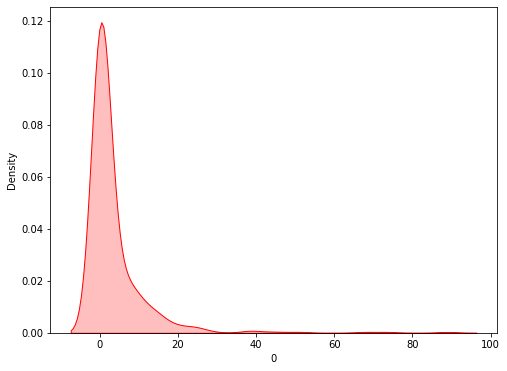

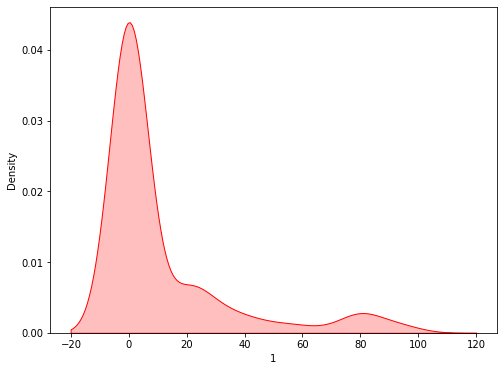

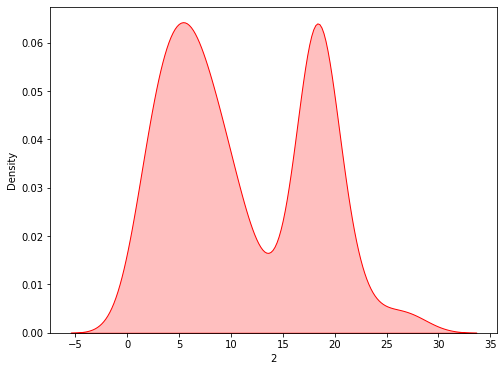

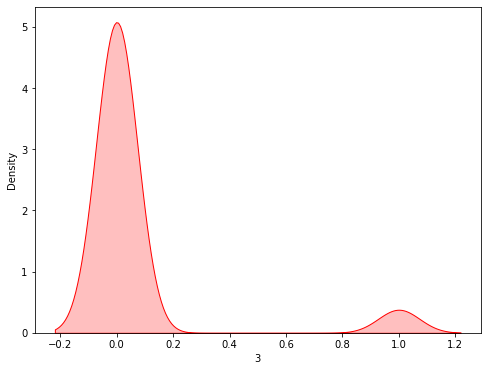

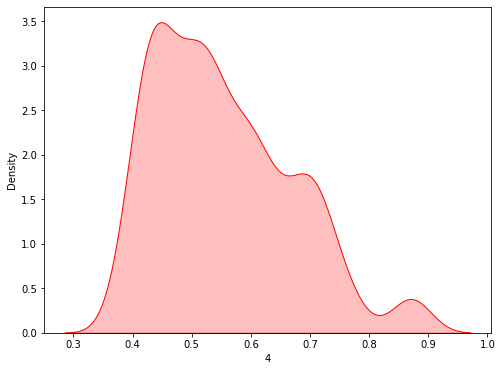

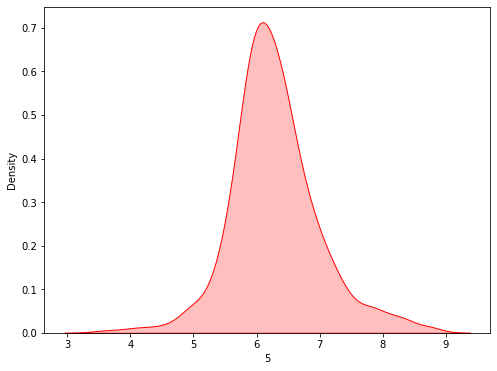

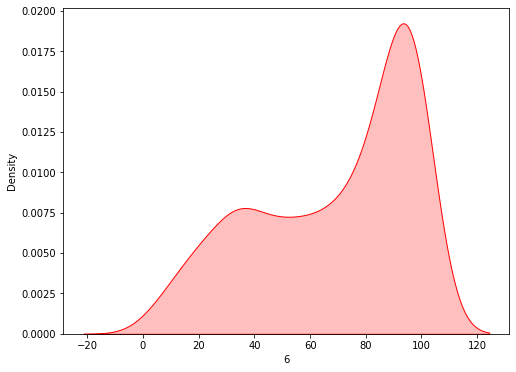

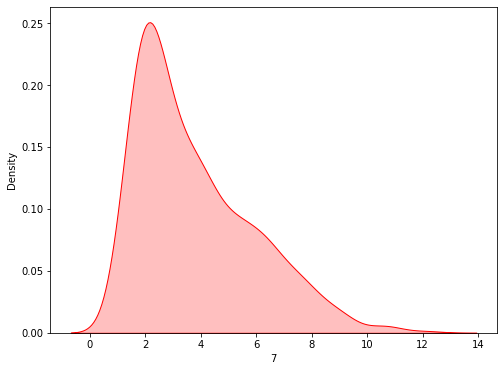

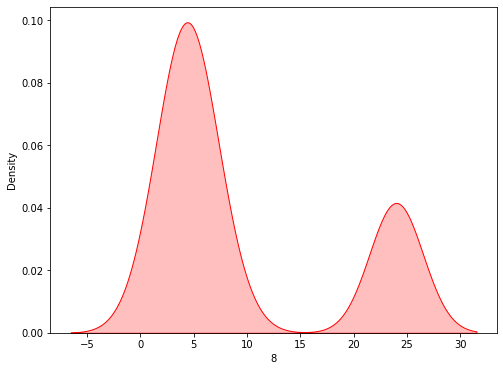

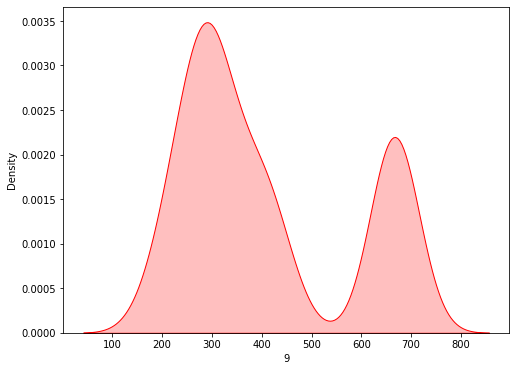

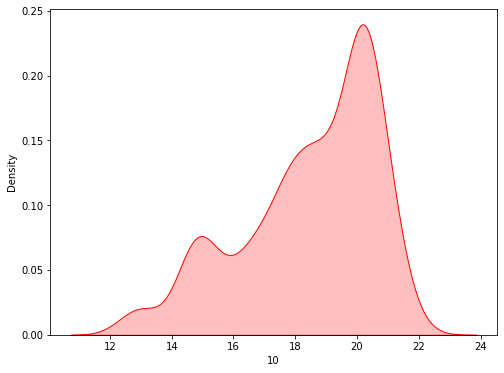

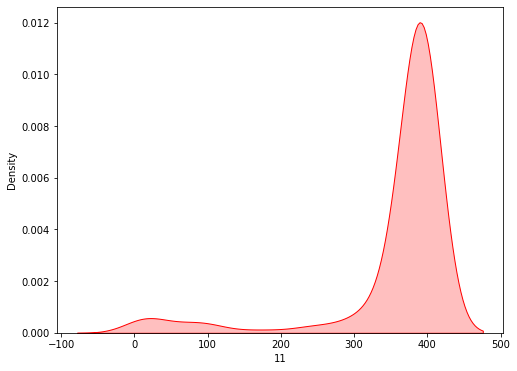

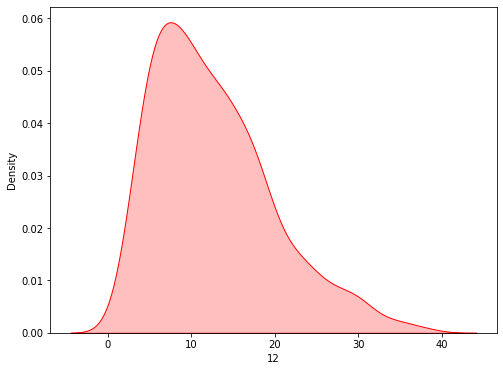

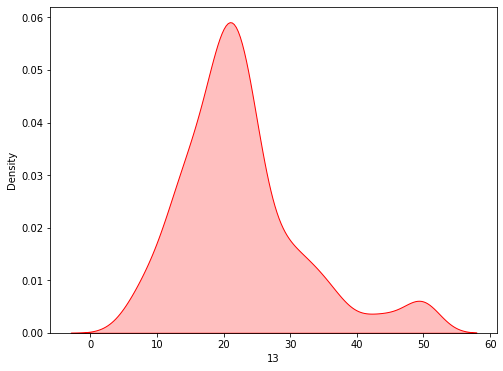

In [280]:
# KDE Plot
for col in df.columns:
    plt.figure(figsize= (8,6))
    ax = sns.kdeplot(df[col], shade=True, color="r")
    plt.show()

In [281]:
# Calculate the skewness and kurtosis values
for col in df.columns:
    print(col)
    print("skewness:", df[col].skew())
    print("kurtosis:", df[col].kurtosis())
    print('-'*35)

0
skewness: 5.223148798243851
kurtosis: 37.13050912952203
-----------------------------------
1
skewness: 2.2256663227354307
kurtosis: 4.031510083739155
-----------------------------------
2
skewness: 0.29502156787351164
kurtosis: -1.2335396011495188
-----------------------------------
3
skewness: 3.405904172058746
kurtosis: 9.638263777819526
-----------------------------------
4
skewness: 0.7293079225348787
kurtosis: -0.06466713336542629
-----------------------------------
5
skewness: 0.40361213328874385
kurtosis: 1.8915003664993404
-----------------------------------
6
skewness: -0.5989626398812962
kurtosis: -0.9677155941626912
-----------------------------------
7
skewness: 1.0117805793009007
kurtosis: 0.4879411222443908
-----------------------------------
8
skewness: 1.0048146482182057
kurtosis: -0.8672319936034931
-----------------------------------
9
skewness: 0.669955941795016
kurtosis: -1.1424079924768082
-----------------------------------
10
skewness: -0.8023249268537809
kurt

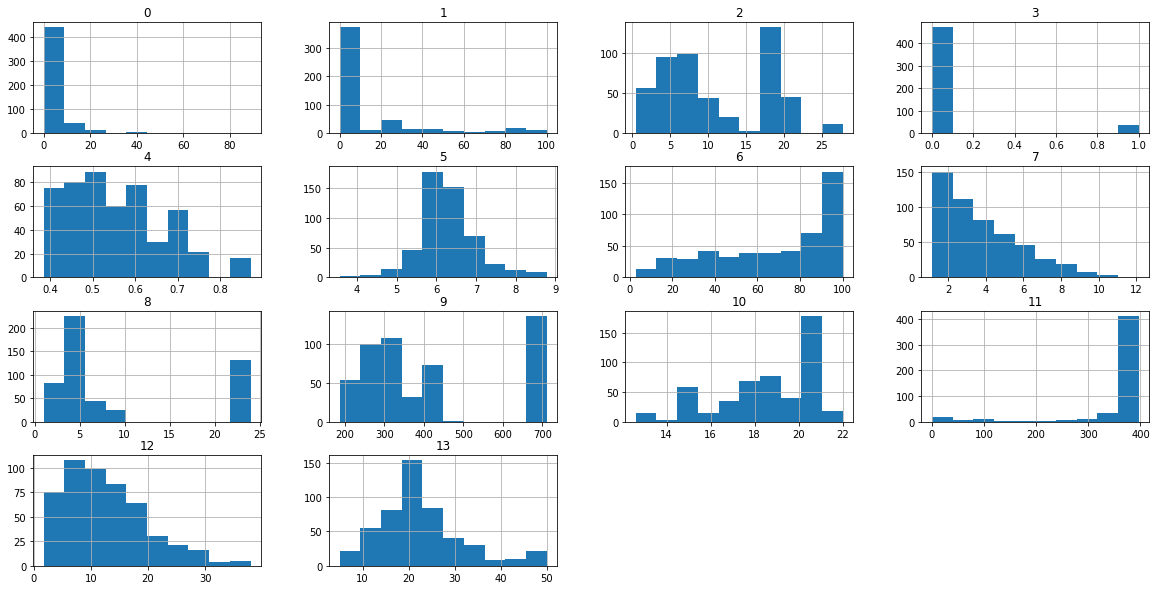

In [282]:
# Visualize histogram of dataset
df.hist(figsize= (20,10), bins= 10)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

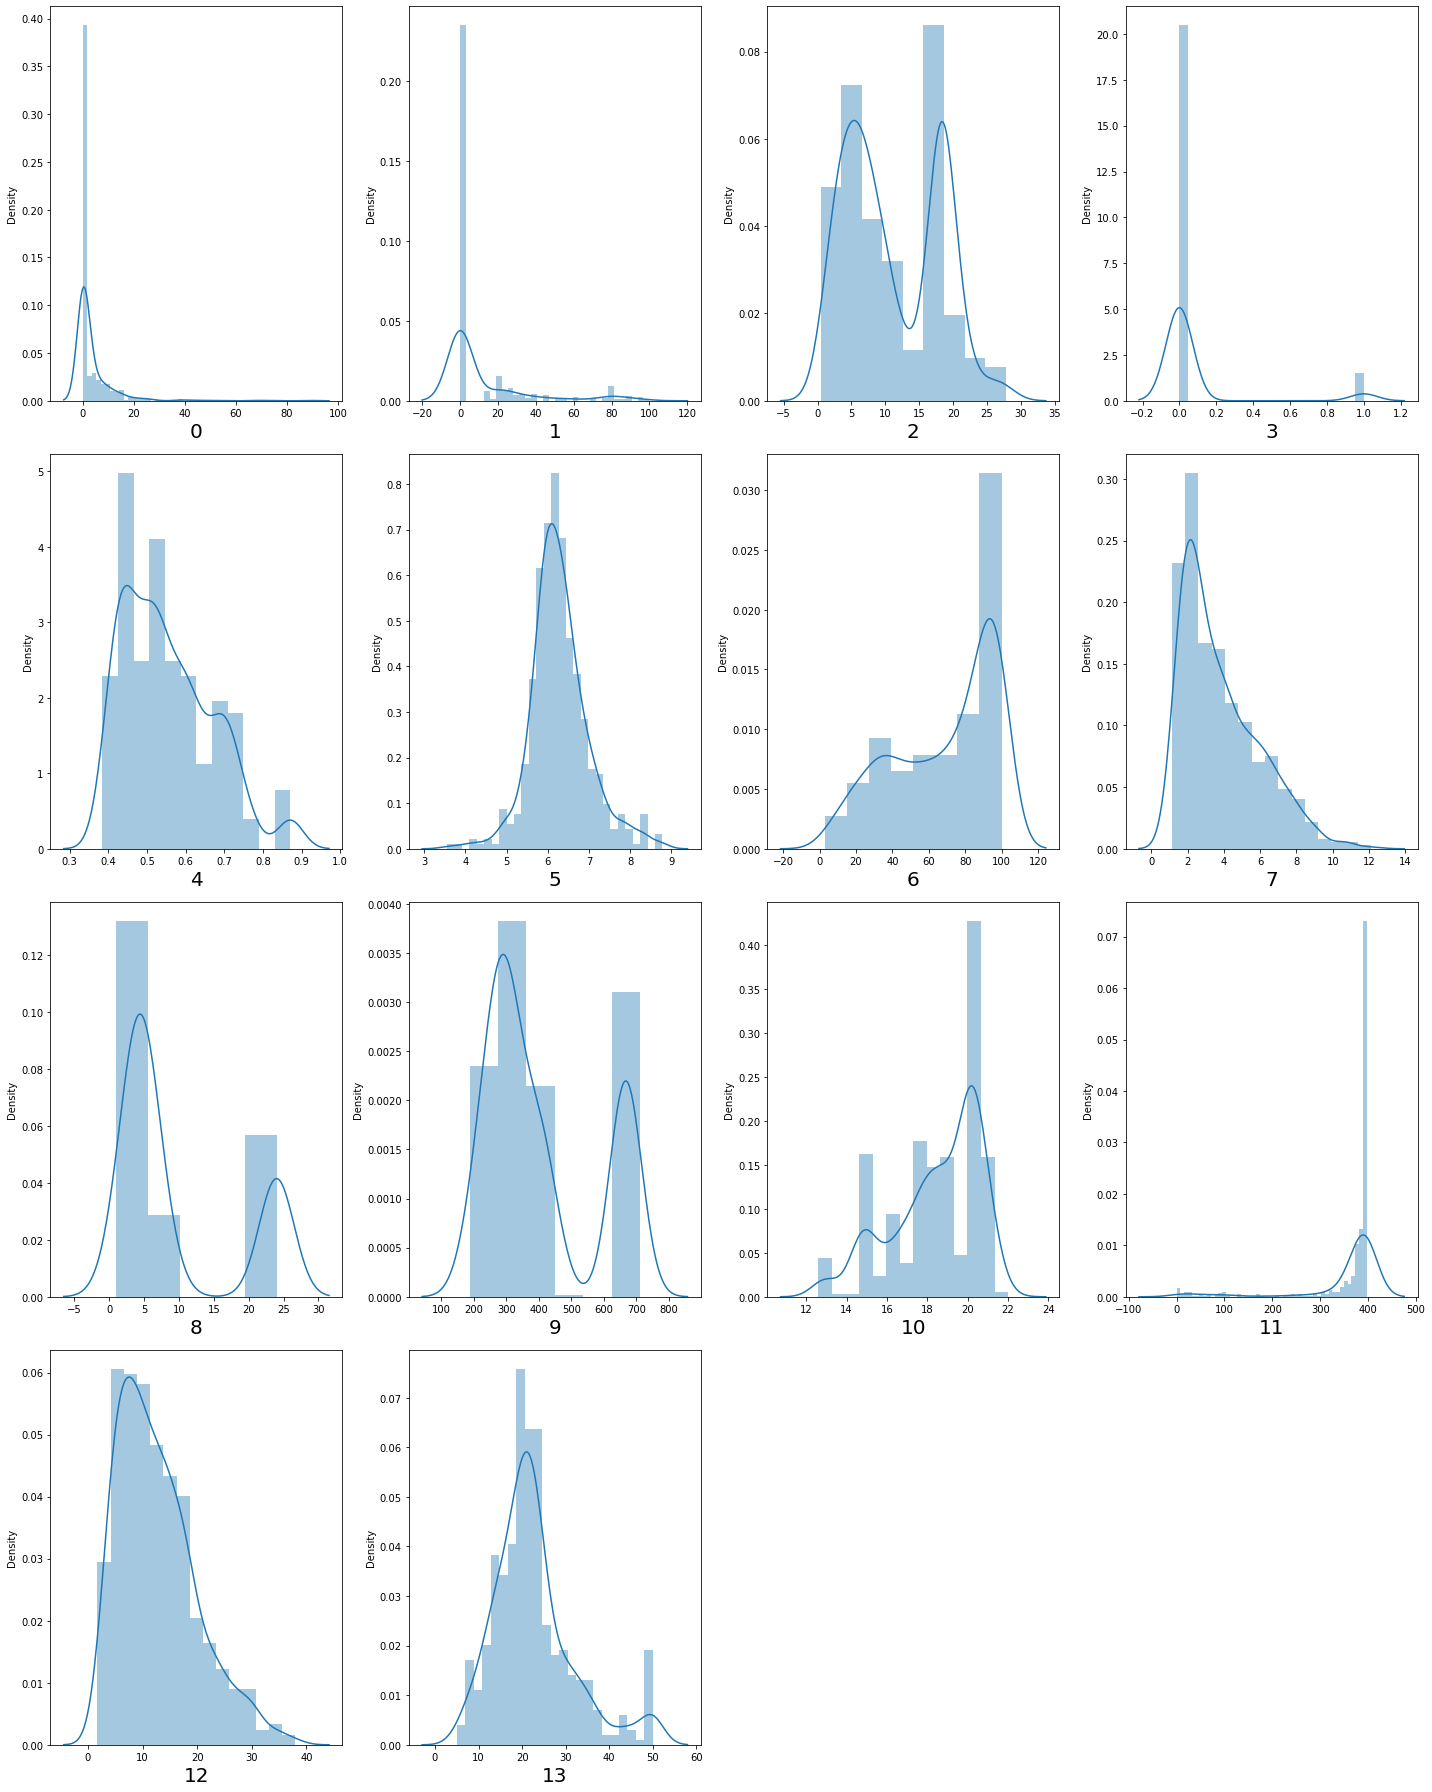

In [283]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### The data distribution looks like there is some skewness and outliers but for now we will go ahead without addressing them . Let's observe the relationship between independent variables and dependent variable.

In [284]:
# Check for outliers
from scipy import stats
zscore = np.abs(stats.zscore(df))
zscore

array([[0.41978194, 0.28482986, 1.2879095 , ..., 0.44105193, 1.0755623 ,
        0.15968566],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.44105193, 0.49243937,
        0.10152429],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.39642699, 1.2087274 ,
        1.32424667],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 0.44105193, 0.98304761,
        0.14880191],
       [0.40776407, 0.48772236, 0.11573841, ..., 0.4032249 , 0.86530163,
        0.0579893 ],
       [0.41500016, 0.48772236, 0.11573841, ..., 0.44105193, 0.66905833,
        1.15724782]])

In [285]:
## For simplicity remove all data with outliers
df_clean = df.copy()
df_clean = df[(zscore <3).all(axis = 1)]
print("The shape of the original dataframe is :", df.shape)
print("The shape of the clean dataframe is :", df_clean.shape)

deleted_entries = df.shape[0] - df_clean.shape[0]
print("Entries deleted in the dataframe are :",  deleted_entries)

The shape of the original dataframe is : (506, 14)
The shape of the clean dataframe is : (415, 14)
Entries deleted in the dataframe are : 91


In [286]:
# Check for correlation between independent and dependent varaible
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [287]:
# We drop columns 3 and 11 from dataframe as they are weak predictors of price corr less than 0.4
df2 = df.drop([0,1, 3,6, 7,8,11], axis = 1)
df2.reset_index(drop = True, inplace= True)
df2.head()

,2,4,5,9,10,12,13
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


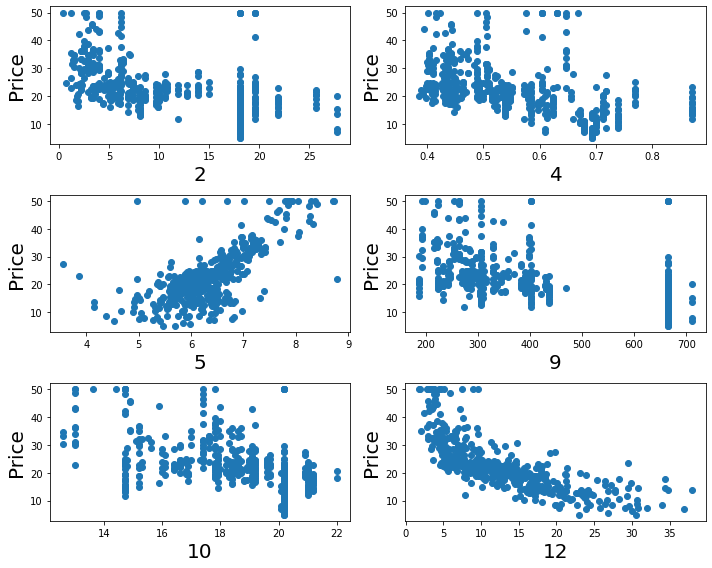

In [288]:
# create X and y
X = df2.iloc[:, :-1]
y = df2.iloc[:,-1]

plt.figure(figsize=(10,8), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=6 :
        ax = plt.subplot(3,2,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [289]:
# Let's move ahead and check for multicollinearity.
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

vif

,VIF,Features
0,3.247388,2
1,3.004119,4
2,1.702434,5
3,2.600211,9
4,1.491134,10
5,2.418666,12


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go. 

Great. Let's go ahead and use linear regression and see how good it fits our data.
But first. let's split our data in train and test.

In [290]:
# Let's extract columns to be used for future training 
fe_columns = X.columns
print(fe_columns)

Int64Index([2, 4, 5, 9, 10, 12], dtype='int64')


In [291]:
# Split data into train and test set
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.18,random_state=3)

In [292]:
y_train[0:5]

328    19.3
225    50.0
175    29.4
475    13.3
204    50.0
Name: 13, dtype: float64

In [293]:
x_train[0:5]

array([[-1.15221381, -0.81800718, -0.59356179,  0.1292557 , -0.71922039,
        -0.37609513],
       [-0.72032214, -0.43792065,  3.47668804, -0.6012761 , -0.48803915,
        -1.12462313],
       [-1.03402724, -0.38609067,  0.37235679, -0.66660821, -0.85792914,
        -1.02650148],
       [ 1.01599907,  0.25314575, -0.17471214,  1.53092646,  0.80657583,
         1.60456043],
       [-1.23392304, -1.19722987,  2.4922489 , -1.09423658, -1.73641788,
        -1.36992725]])

In [294]:
# Fit regression model
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [295]:
# Evaluate fitted model on train set (Rsquared)
regression.score(x_train,y_train)

0.6683698843688528

In [296]:
# Evaluate fitted model on train set ( Adjusted Rsquared)
adj_r2(x_train,y_train)

0.6634809883153223

Our r2 score is 66.83% and adj r2 is 66.35% for our training et., so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

Now let's check if our model is overfitting our data using regularization.

In [297]:
# Evaluate fitted model on test set (Rsquared)
regression.score(x_test,y_test)

0.7453534013049359

In [298]:
# Evaluate fitted model on test set ( Adjusted Rsquared)
adj_r2(x_test, y_test)


0.727378347279402

Clearly, our model r2 score is greater on the test data. Hence our model is not overfitting

In [299]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [300]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.008929498755221076

In [301]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.008929498755221076, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [302]:
lasso_reg.score(x_test, y_test)

0.7439953857137098

We have demonstrated that r2_score for test data (74.40%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data. We perform one more check using elastic net

In [303]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [304]:
elasticCV.alpha_

0.08498012096452186

In [305]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [306]:
# Train model
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.08498012096452186, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [307]:
# Evaluate trained model
elasticnet_reg.score(x_test, y_test)

0.7424562095877005

Without a doubt, we have established through Lasso and Elastic net  regularization that our OLS model has been well trained over the training data and there is no overfitting.

## Polynomial Regression ( To improve the performance of the model)

In [308]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  #trying to create a 2 degree polynomial equation. It simply squares the x as shown in the output
X_poly = poly_reg.fit_transform(x_train)
print(X_poly)

[[ 1.         -1.15221381 -0.81800718 ...  0.51727797  0.27049528
   0.14144754]
 [ 1.         -0.72032214 -0.43792065 ...  0.23818221  0.54886011
   1.26477718]
 [ 1.         -1.03402724 -0.38609067 ...  0.73604241  0.88066553
   1.05370529]
 ...
 [ 1.         -0.76993132 -1.06851875 ...  0.08879035 -0.25449858
   0.72946585]
 [ 1.          1.2319449   2.73234648 ...  3.01514704  0.12974773
   0.0055833 ]
 [ 1.          1.01599907  1.85987514 ...  0.65056458 -0.27847587
   0.11920232]]


In [309]:
# doing the actual polynomial Regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [312]:
# Evaluate trained model (Rsquared)
y_hat = lin_reg_2.predict(X_poly)

from sklearn.metrics import r2_score, mean_squared_error

print("r2 score is :", r2_score(y_train, y_hat))
print(lin_reg_2.score(X_poly, y_train))
print("Train-set Root Mean Equared Error (RMSE) :", np.sqrt( mean_squared_error(y_train, y_hat)  ) )

r2 score is : 0.8506340031841625
0.8506340031841625
Train-set Root Mean Equared Error (RMSE) : 3.6122817344485947


In [311]:
# Evaluate the model on test set (Rsquared)
y_pred = lin_reg_2.predict(poly_reg.transform(x_test))


# Evaluate fitted model on train set ( Adjusted Rsquared)
from sklearn.metrics import r2_score, mean_squared_error

print("r2 score is :", r2_score(y_test, y_pred))

print(lin_reg_2.score(poly_reg.transform(x_test), y_test))
print("Test-set Root Mean Equared Error (RMSE) :", np.sqrt( mean_squared_error(y_test, y_pred)  ) )

r2 score is : 0.8865994946933522
0.8865994946933522
Root Mean Equared Error (RMSE) : 2.841031566906104


Our best linear regression model was achieved using polynomial regression and it resulted in the following: 



*   Train set: r2 score of 85.06% and root mean squared error of 3.61 
*   Test set: r2 score of 88.66% and root mean squared error of 2.84 